## Multi - span feature

Grillages can be created with multiple spans. This is done by supporting nodes at intermediate points along the mesh (in the x global x direction) to represent supports of spans, as shown in the following figure:

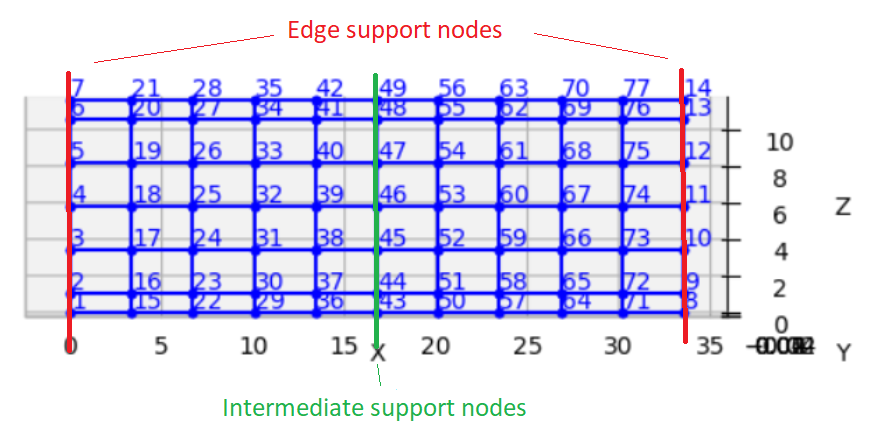

In [9]:
from IPython import display  # to display images in this notebook
display.Image("../images/multi_span_overview.PNG",width=800)

There are three types of multi-span meshing feature available in ospgrillage since v0.1.1.

In this example, lets explore the various types of multi-span meshing by creating a simple grillage model with multiple spans: the first and third span are 9 m while the second span is 12 m. Starting of with the necessary imports:

In [6]:
import numpy as np
import ospgrillage as og 
%matplotlib inline

Similar to the first example, we define the standard variables for the grillage as follows:

In [2]:
# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa

# parameters of bridge grillage
L = 33.5 * m  # span
w = 11.565 * m  # width
n_l = 7  # number of longitudinal members
n_t = 11  # number of transverse members
edge_dist = 1.05 * m  # distance between edge beam and first exterior beam
bridge_name = "multi span showcase"
angle = 20 # degree
mesh_type = "Oblique"

Then, we define variables specific for multi-span feature.

Multi-span meshes require the following variables:

1) A `list` containing the span length (x direction) of each span.
2) A `list` containing the number of transverse members in each span. If this is not provided, ospgrillage sets the default value to 10 for 
all spans.
3) A variable to define the spacing between span meshes. This is required if non-continuous meshes is selected.

In [3]:
spans = [9* m, 12* m, 9* m]  
nl_multi = [20,10,20]
stich_slab_x_spacing = 0.5 * m

Define the materials and sections of the grillage similar to the standard workflow.

In [4]:
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")

# define sections (parameters from LUSAS model)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A=1.025 * m2,
    J=0.1878 * m3,
    Iz=0.3694 * m4,
    Iy=0.113887e-3 * m4,
    Az=0.0371929 * m2,
    Ay=0.0371902 * m2,
)

transverse_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
)

end_transverse_section = og.create_section(
    A=0.504 / 2 * m2,
    J=2.5012e-3 * m3,
    Iy=0.04116 * m4,
    Iz=0.6804e-3 * m4,
    Ay=0.21 * m2,
    Az=0.21 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=concrete)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
transverse_slab = og.create_member(section=transverse_section, material=concrete)
end_transverse_slab = og.create_member(
    section=end_transverse_section, material=concrete
)

At the `create_grillage` step, pass in the multi-span variables to the respective keyword arguments as follows, labelling the object created as `variant_one_model`. Setting the `continuous=` keyword argument to `True` gives us the first model variant of multi-span feature.

In [5]:
variant_one_model = og.create_grillage(
        bridge_name=bridge_name,
        long_dim=L,
        width=w,
        skew=angle,
        num_long_grid=n_l,
        num_trans_grid=n_t,
        edge_beam_dist=edge_dist,
        mesh_type=mesh_type,
        multi_span_dist_list=spans,
        multi_span_num_points=nl_multi,
        continuous=True,
        non_cont_spacing_x=stich_slab_x_spacing,
    )

Now we set the members to the model object, create the model, and plot.

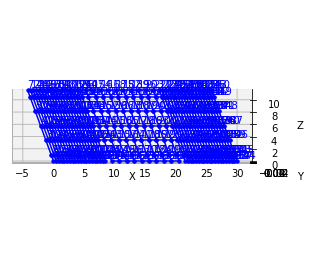

In [6]:
# assign grillage member to element groups of grillage model
variant_one_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_one_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_one_model.set_member(transverse_slab, member="transverse_slab")
variant_one_model.set_member(end_transverse_slab, member="start_edge")
variant_one_model.set_member(end_transverse_slab, member="end_edge")
#sn3615.set_member(stich_slab, member="stitch_elements")

variant_one_model.create_osp_model(pyfile=False)
og.opsv.plot_model(element_labels=0, az_el=(-90, 0))  # plotting using ops_vis
og.plt.show()

As can be seen, the mesh spacings in each span varies according to the `nl_multi` variable we specified - 10 nodes in the second span then 20 node lines in first and third span.

For the second variant, we set `continuous=` keyword argument as `False`. This results in gaps between each span's mesh. This variant can be useful for creating multiple non-connecting meshes in the same model space.

For this variant, the distance between meshes must be provided to the `non_cont_spacing_x=`  keyword argument. Then label as `variant_two_model`.

In [7]:
variant_two_model = og.create_grillage(
        bridge_name=bridge_name,
        long_dim=L,
        width=w,
        skew=angle,
        num_long_grid=n_l,
        num_trans_grid=n_t,
        edge_beam_dist=edge_dist,
        # ext_to_int_dist=ext_to_int_dist,
        mesh_type=mesh_type,
        multi_span_dist_list=spans,
        multi_span_num_points=[20,10,20],
        continuous=False,
        non_cont_spacing_x=stich_slab_x_spacing,
    )

Set members, create model and plot.

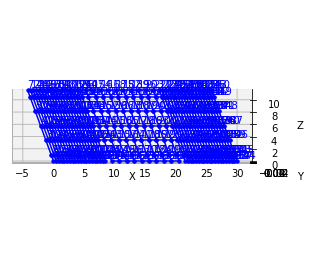

In [8]:
variant_two_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_two_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_two_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_two_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_two_model.set_member(transverse_slab, member="transverse_slab")
variant_two_model.set_member(end_transverse_slab, member="start_edge")
variant_two_model.set_member(end_transverse_slab, member="end_edge")

variant_two_model.create_osp_model(pyfile=False)
og.opsv.plot_model(element_labels=0, az_el=(-90, 0))  # plotting using ops_vis
og.plt.show()

As can be seen in `variant_two_model`, the meshes are separated at the intermediate support nodes. The meshing splits the nodes at the intermediate support region by the distance variable provided in `non_cont_spacing_x=` , in the global x-direction. 

The third variant is similar to second variant but with the definition of stiching elements between meshes. This is useful to represent bridges which usually have stitch slab elements between spans - cast insitu slabs that connects beams providing continuity. 

For this, a `GrillageMember` object is required to define the stitch elements between the meshes. Wecan define the slab element as such:

In [9]:
stitch_slab_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
)
stich_slab = og.create_member(section=stitch_slab_section, material=concrete)

The `create_grillage` step is similar to that of `variant_two_model` - we label this model as `variant_three_model`.

In [10]:
variant_three_model = og.create_grillage(
        bridge_name=bridge_name,
        long_dim=L,
        width=w,
        skew=angle,
        num_long_grid=n_l,
        num_trans_grid=n_t,
        edge_beam_dist=edge_dist,
        mesh_type=mesh_type,
        multi_span_dist_list=spans,
        multi_span_num_points=[20,10,20],
        continuous=False,
        non_cont_spacing_x=stich_slab_x_spacing,
    )

For `variant_three_model`, we set the defined stitch slab elements with `set_member` to members="stitch_elements" as shown:

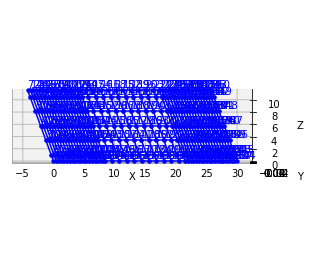

In [11]:
variant_three_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_three_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_three_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_three_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_three_model.set_member(transverse_slab, member="transverse_slab")
variant_three_model.set_member(end_transverse_slab, member="start_edge")
variant_three_model.set_member(end_transverse_slab, member="end_edge")
variant_three_model.set_member(stich_slab, member="stitch_elements")

variant_three_model.create_osp_model(pyfile=False)
og.opsv.plot_model(element_labels=0, az_el=(-90, 0))  # plotting using ops_vis
og.plt.show()